<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
import csv
sat_data=[]
with open('sat_scores.csv') as csvfile:
    first_open = csv.reader(csvfile, delimiter=',')
    for row in first_open:
        sat_data.append(row)
header=sat_data[0]
rest_data=sat_data[1:]

In [3]:
data={}
for ind,i in enumerate (header):
    data.update({i:[]})
    for j in rest_data:
        for ex,dat in enumerate (j):
            data[i].append(j[ind])    

In [4]:
print(data)

{'State': ['CT', 'CT', 'CT', 'CT', 'NJ', 'NJ', 'NJ', 'NJ', 'MA', 'MA', 'MA', 'MA', 'NY', 'NY', 'NY', 'NY', 'NH', 'NH', 'NH', 'NH', 'RI', 'RI', 'RI', 'RI', 'PA', 'PA', 'PA', 'PA', 'VT', 'VT', 'VT', 'VT', 'ME', 'ME', 'ME', 'ME', 'VA', 'VA', 'VA', 'VA', 'DE', 'DE', 'DE', 'DE', 'MD', 'MD', 'MD', 'MD', 'NC', 'NC', 'NC', 'NC', 'GA', 'GA', 'GA', 'GA', 'IN', 'IN', 'IN', 'IN', 'SC', 'SC', 'SC', 'SC', 'DC', 'DC', 'DC', 'DC', 'OR', 'OR', 'OR', 'OR', 'FL', 'FL', 'FL', 'FL', 'WA', 'WA', 'WA', 'WA', 'TX', 'TX', 'TX', 'TX', 'HI', 'HI', 'HI', 'HI', 'AK', 'AK', 'AK', 'AK', 'CA', 'CA', 'CA', 'CA', 'AZ', 'AZ', 'AZ', 'AZ', 'NV', 'NV', 'NV', 'NV', 'CO', 'CO', 'CO', 'CO', 'OH', 'OH', 'OH', 'OH', 'MT', 'MT', 'MT', 'MT', 'WV', 'WV', 'WV', 'WV', 'ID', 'ID', 'ID', 'ID', 'TN', 'TN', 'TN', 'TN', 'NM', 'NM', 'NM', 'NM', 'IL', 'IL', 'IL', 'IL', 'KY', 'KY', 'KY', 'KY', 'WY', 'WY', 'WY', 'WY', 'MI', 'MI', 'MI', 'MI', 'MN', 'MN', 'MN', 'MN', 'KS', 'KS', 'KS', 'KS', 'AL', 'AL', 'AL', 'AL', 'NE', 'NE', 'NE', 'NE', 'OK',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
df1=pd.DataFrame(data=data)

df1.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [6]:
df2=pd.read_csv('sat_scores.csv')

df2.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 


### ANS
By loading using csv module the number columsn come as object types

By pandas its taken in as number int type

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
df2.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [8]:
df2.shape

(52, 4)

In [9]:
df2.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


## ANS
#### From the above we have got 52 rows with four columns
#### first column is the label for stated of USA, 3rd and 4th  are  possibly Average scores in the state for Verbal and Math
#### 2nd column could be referring to the pass rate of students

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

# DATA DICTIONARY
>State: Initials for each state.

>Rate: Percentage of students that took the test(%).

>Verbal:Average  score for verbal.

>Math: Average score for math.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

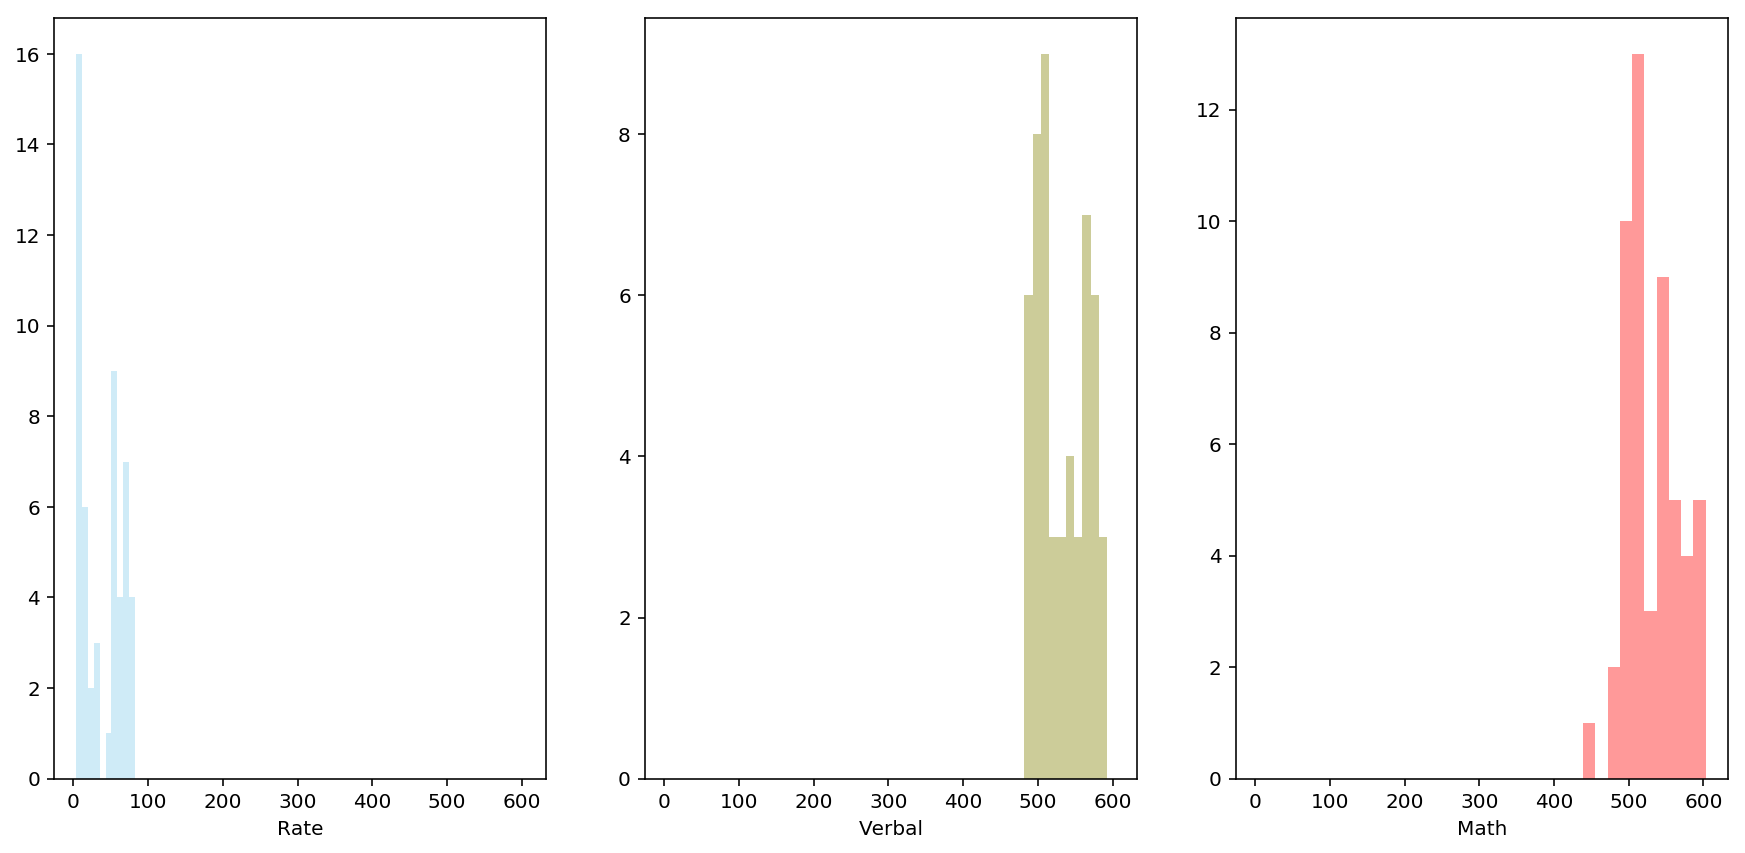

In [10]:
f, axes = plt.subplots(1, 3, figsize=(15, 7), sharex=True)
sns.distplot( df2.Rate , color="skyblue",ax=axes[0],bins=10,kde=False)
sns.distplot( df2.Verbal , color="olive",ax=axes[1],bins=10,kde=False)
sns.distplot( df2.Math , color="red", ax=axes[2],bins=10,kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [12]:
df2['Math'].corr(df2['Verbal'])

0.899870852544429

In [13]:
df2['Verbal'].corr(df2['Math'])

0.8998708525444292

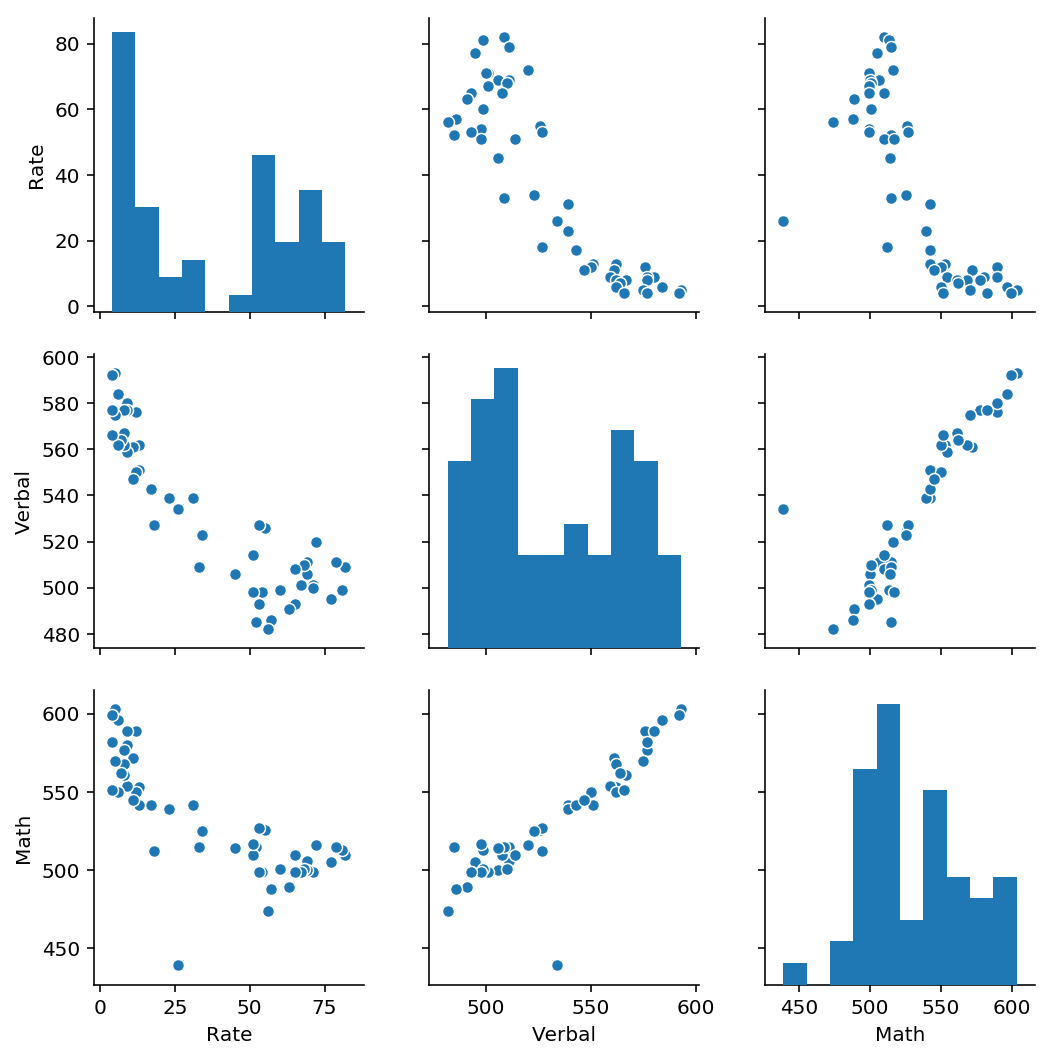

In [11]:
sns.pairplot(df2)

The pairplot gives us a qucik overview to see if there are any correlations between different columns

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

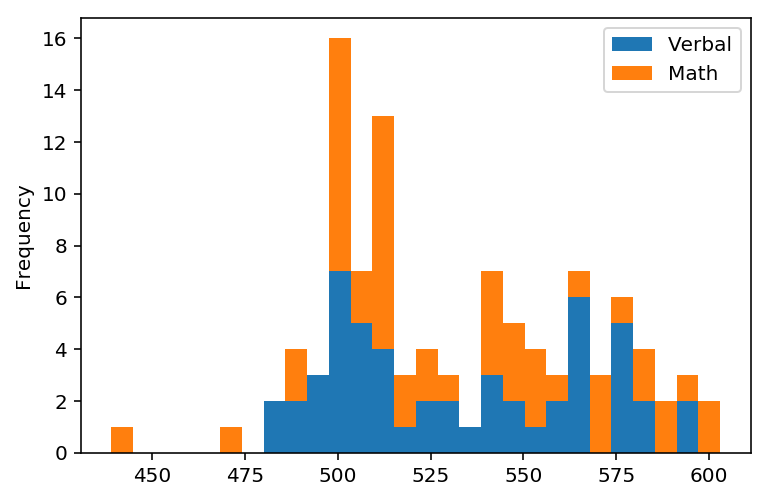

In [12]:
df2[['Verbal','Math']].plot.hist(stacked=True, bins=28)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

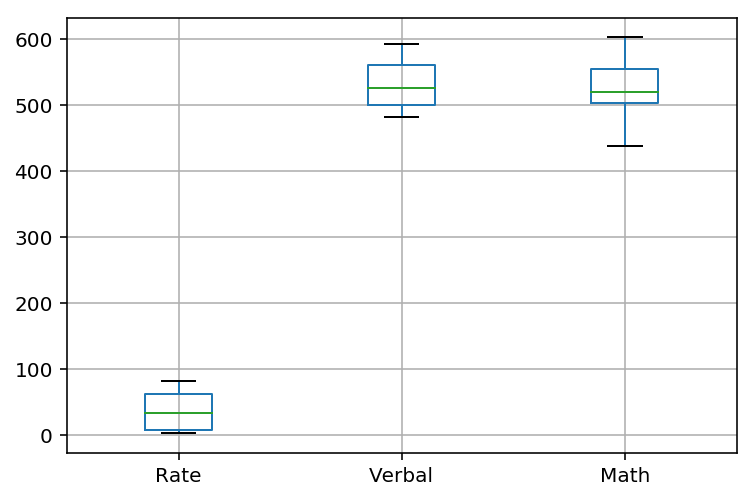

In [13]:
df2.boxplot()

With rate having a different scale and the other two have high numbers we can't really see mucn in terms of relatioship between the three

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [14]:
df2.Verbal.mean()

532.0192307692307

In [15]:
abv_avg=df2.loc[df2['Verbal'] > (df2.Verbal.mean())].sort_values(by='Verbal')

In [16]:
abv_avg['State'].count()

24

### There are 24 states out of the 52 states with scores above the average, distribution could be slightly right skewed

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [17]:
df2.Verbal.median()

526.5

In [18]:
abv_medi=df2.loc[df2['Verbal'] > (df2.Verbal.median())].sort_values(by='Verbal')

In [19]:
abv_medi['State'].count()

26

### The median is the exact middle value hence we have 26/52 states. Also median < average, which also shows the distribution is slightly right skewed

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [20]:
df2['Difference']=df2.Verbal-df2.Math

df2.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

## Q1

In [21]:
mat_mover=df2.sort_values('Difference', ascending=False).head(10).reset_index(drop=True)

mat_mover

,State,Rate,Verbal,Math,Difference
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15
3,AR,6,562,550,12
4,NM,13,551,542,9
5,TN,13,562,553,9
6,VA,68,510,501,9
7,DC,56,482,474,8
8,ME,69,506,500,6
9,OK,8,567,561,6


## Q2

In [22]:
ver_momat=df2.sort_values('Difference', ascending=True).head(10).reset_index(drop=True)

ver_momat

,State,Rate,Verbal,Math,Difference
0,HI,52,485,515,-30
1,CA,51,498,517,-19
2,NJ,81,499,513,-14
3,IL,12,576,589,-13
4,WI,6,584,596,-12
5,MI,11,561,572,-11
6,NY,77,495,505,-10
7,IA,5,593,603,-10
8,MN,9,580,589,-9
9,All,45,506,514,-8


## Q3

In [23]:
print("Top 3 states with Verbal more than Math score\n")
print(mat_mover.head(3))
print("\nTop 3 states with Math more than Verbal score\n")
print(ver_momat.head(3))

Top 3 states with Verbal more than Math score

  State  Rate  Verbal  Math  Difference
0    OH    26     534   439          95
1    MS     4     566   551          15
2    WV    18     527   512          15

Top 3 states with Math more than Verbal score

  State  Rate  Verbal  Math  Difference
0    HI    52     485   515         -30
1    CA    51     498   517         -19
2    NJ    81     499   513         -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


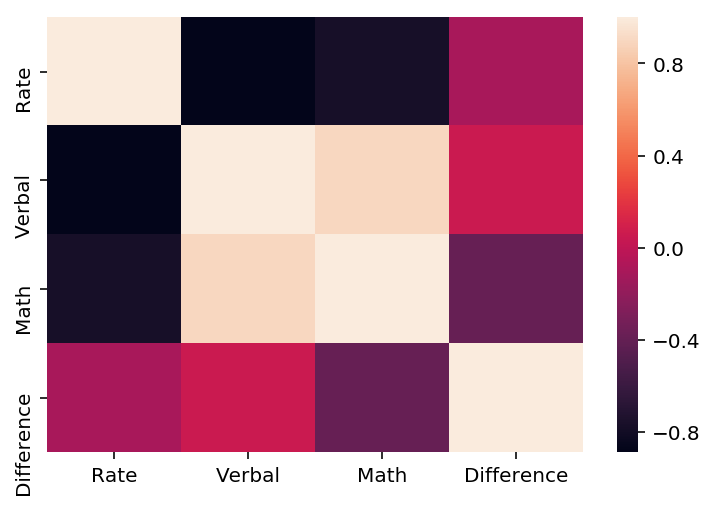

In [24]:
df2_correlations = df2.corr()
sns.heatmap(df2_correlations)

the lighter colors show strong positive correlation, hence states that did well in verbal, also did well in math

the darker colors show srong negative correlation, which indicates when the rate went up scores in math and verbal went down

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [25]:
df2.describe()

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


>**count:** Indicates the number of entries in each column

>**mean:** Average for the columns

>**std:** Standard deviation

>**min:** Smallest value

>**25%:** First quartile

>**50%:** Second quartile

>**75%:** Third quartile

>**max:** Highest value

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [81]:
df3=pd.read_csv('drug-use-by-age.csv')
df3.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [84]:
df3.shape

(17, 28)

In [82]:
df3.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [28]:
#So replace the frequecy columns occurances of '-' with zero and covert to float

for column in df3.drop('age',axis=1):
    if df3[column].dtype == object:
        df3[column]=df3[column].replace('-',0.0).astype(float)
    

In [29]:
df3.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [32]:
df4=df3[df3.columns[::2]]
df4.columns

Index(['age', 'alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use',
       'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use',
       'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use',
       'sedative-use'],
      dtype='object')

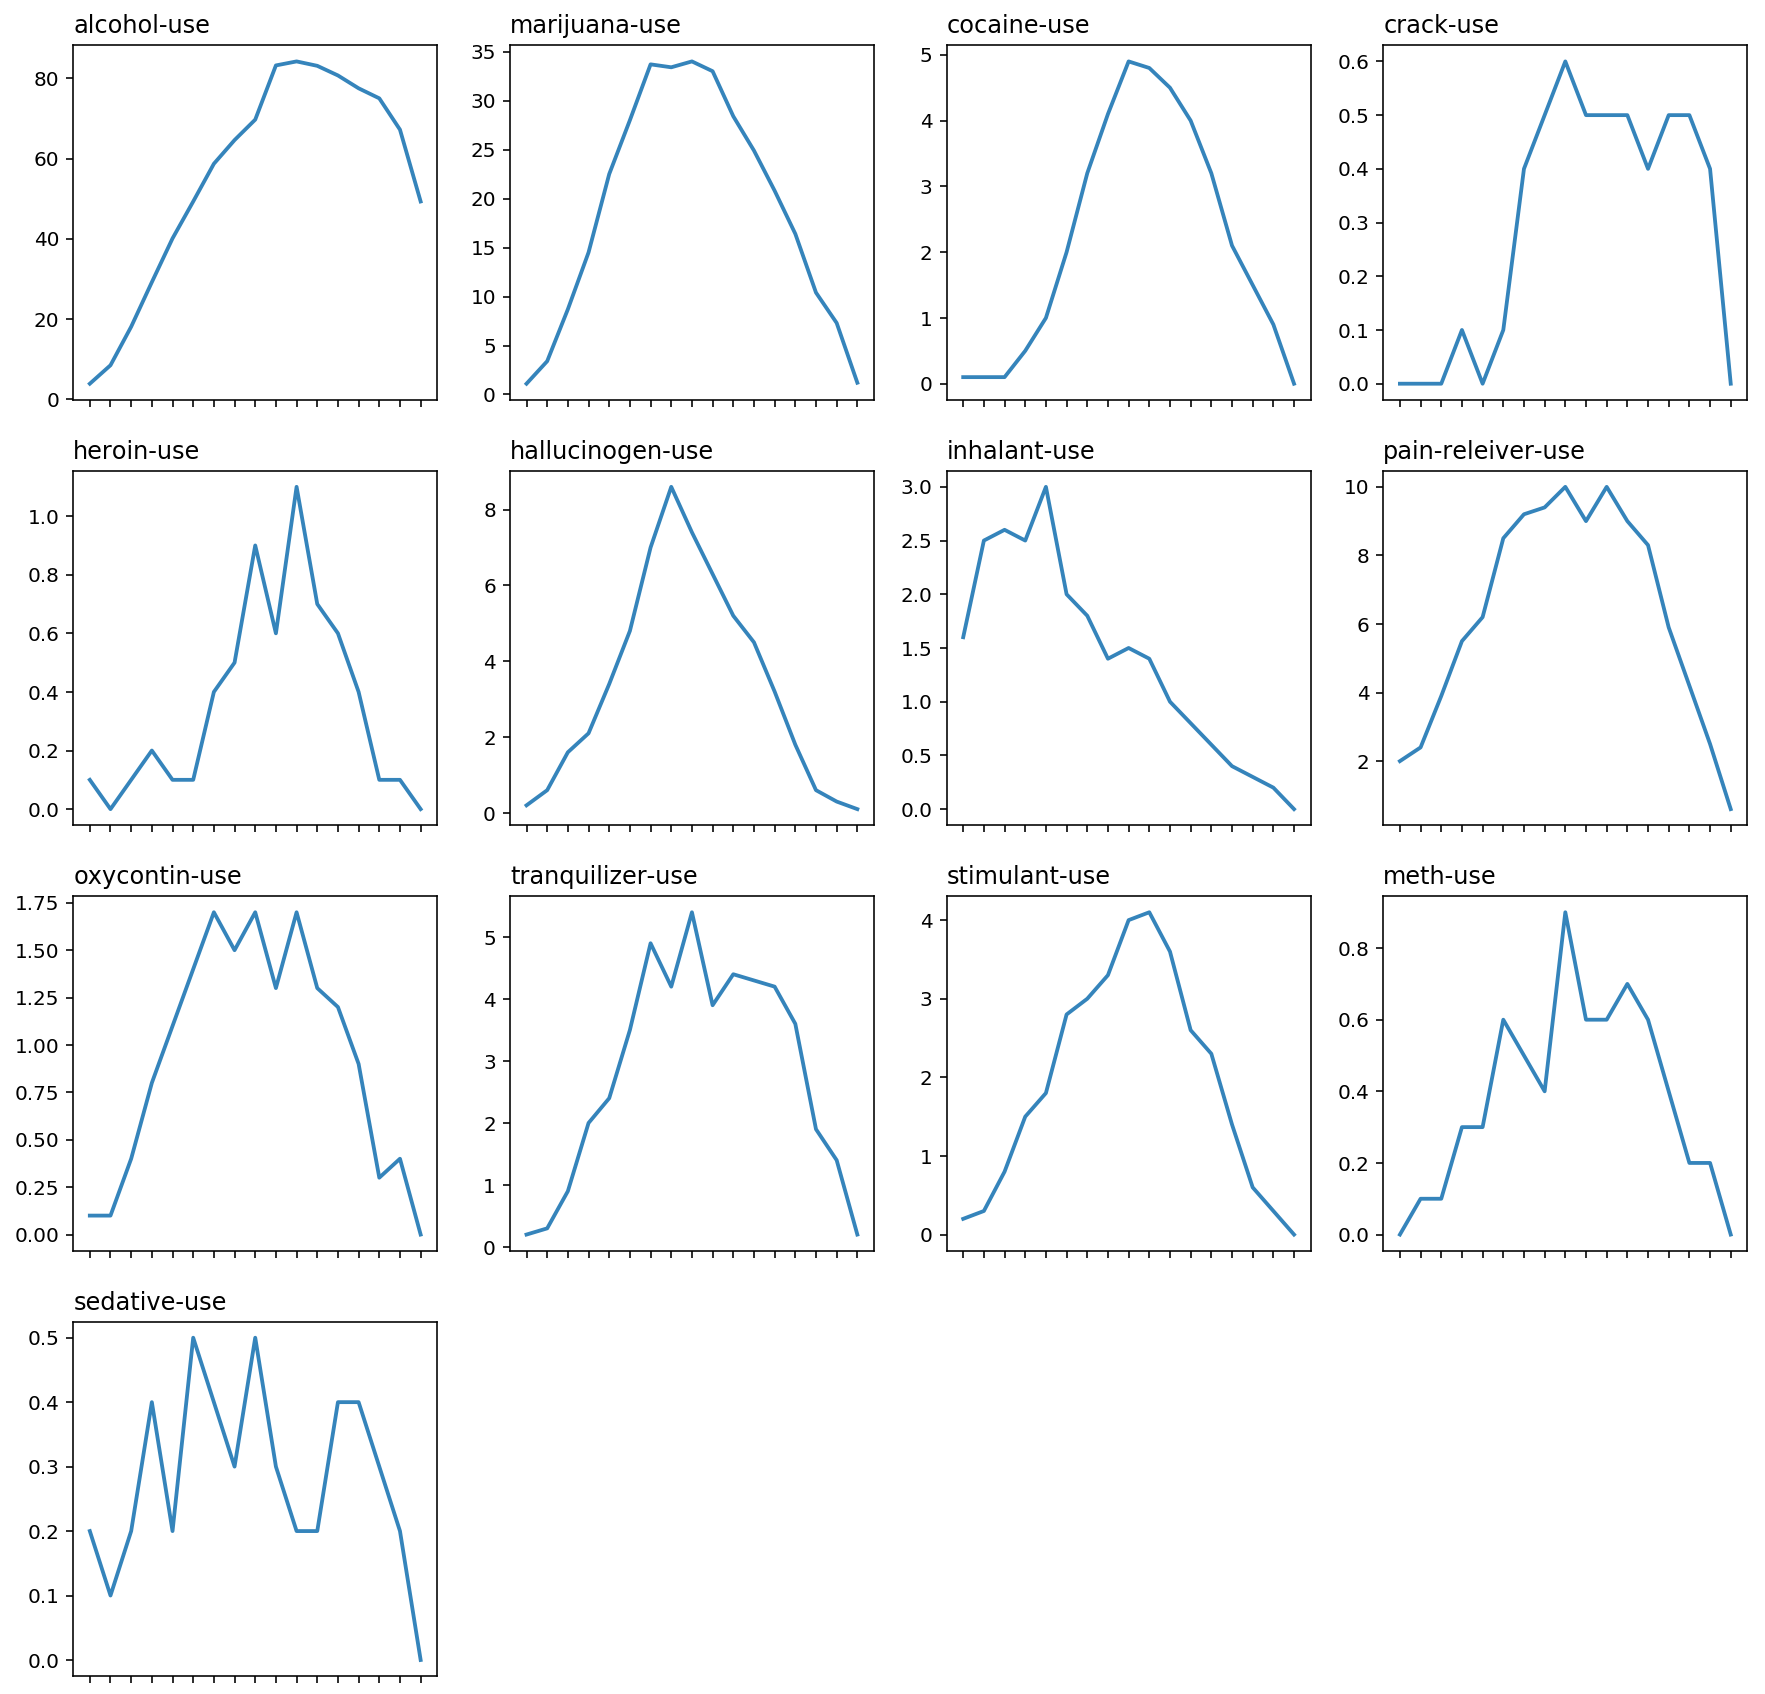

In [33]:
plt.subplots(figsize=(15, 15))
num=0
for column in df4.drop('age',axis=1):
    num+=1
    plt.subplot(4,4,num)
    plt.plot(df4.age,df4[column],linewidth=1.9,alpha=0.9,label=column)
    plt.tick_params(labelbottom=False)
    plt.title(column, loc='left', fontsize=12, fontweight=0)

### Observations
- Nearly all abuse starts-peaks around the middle and drops drastically except for alcohol which does drop by much and inhalants start high

- Alcohol has the highest use percentage followed by marijuana

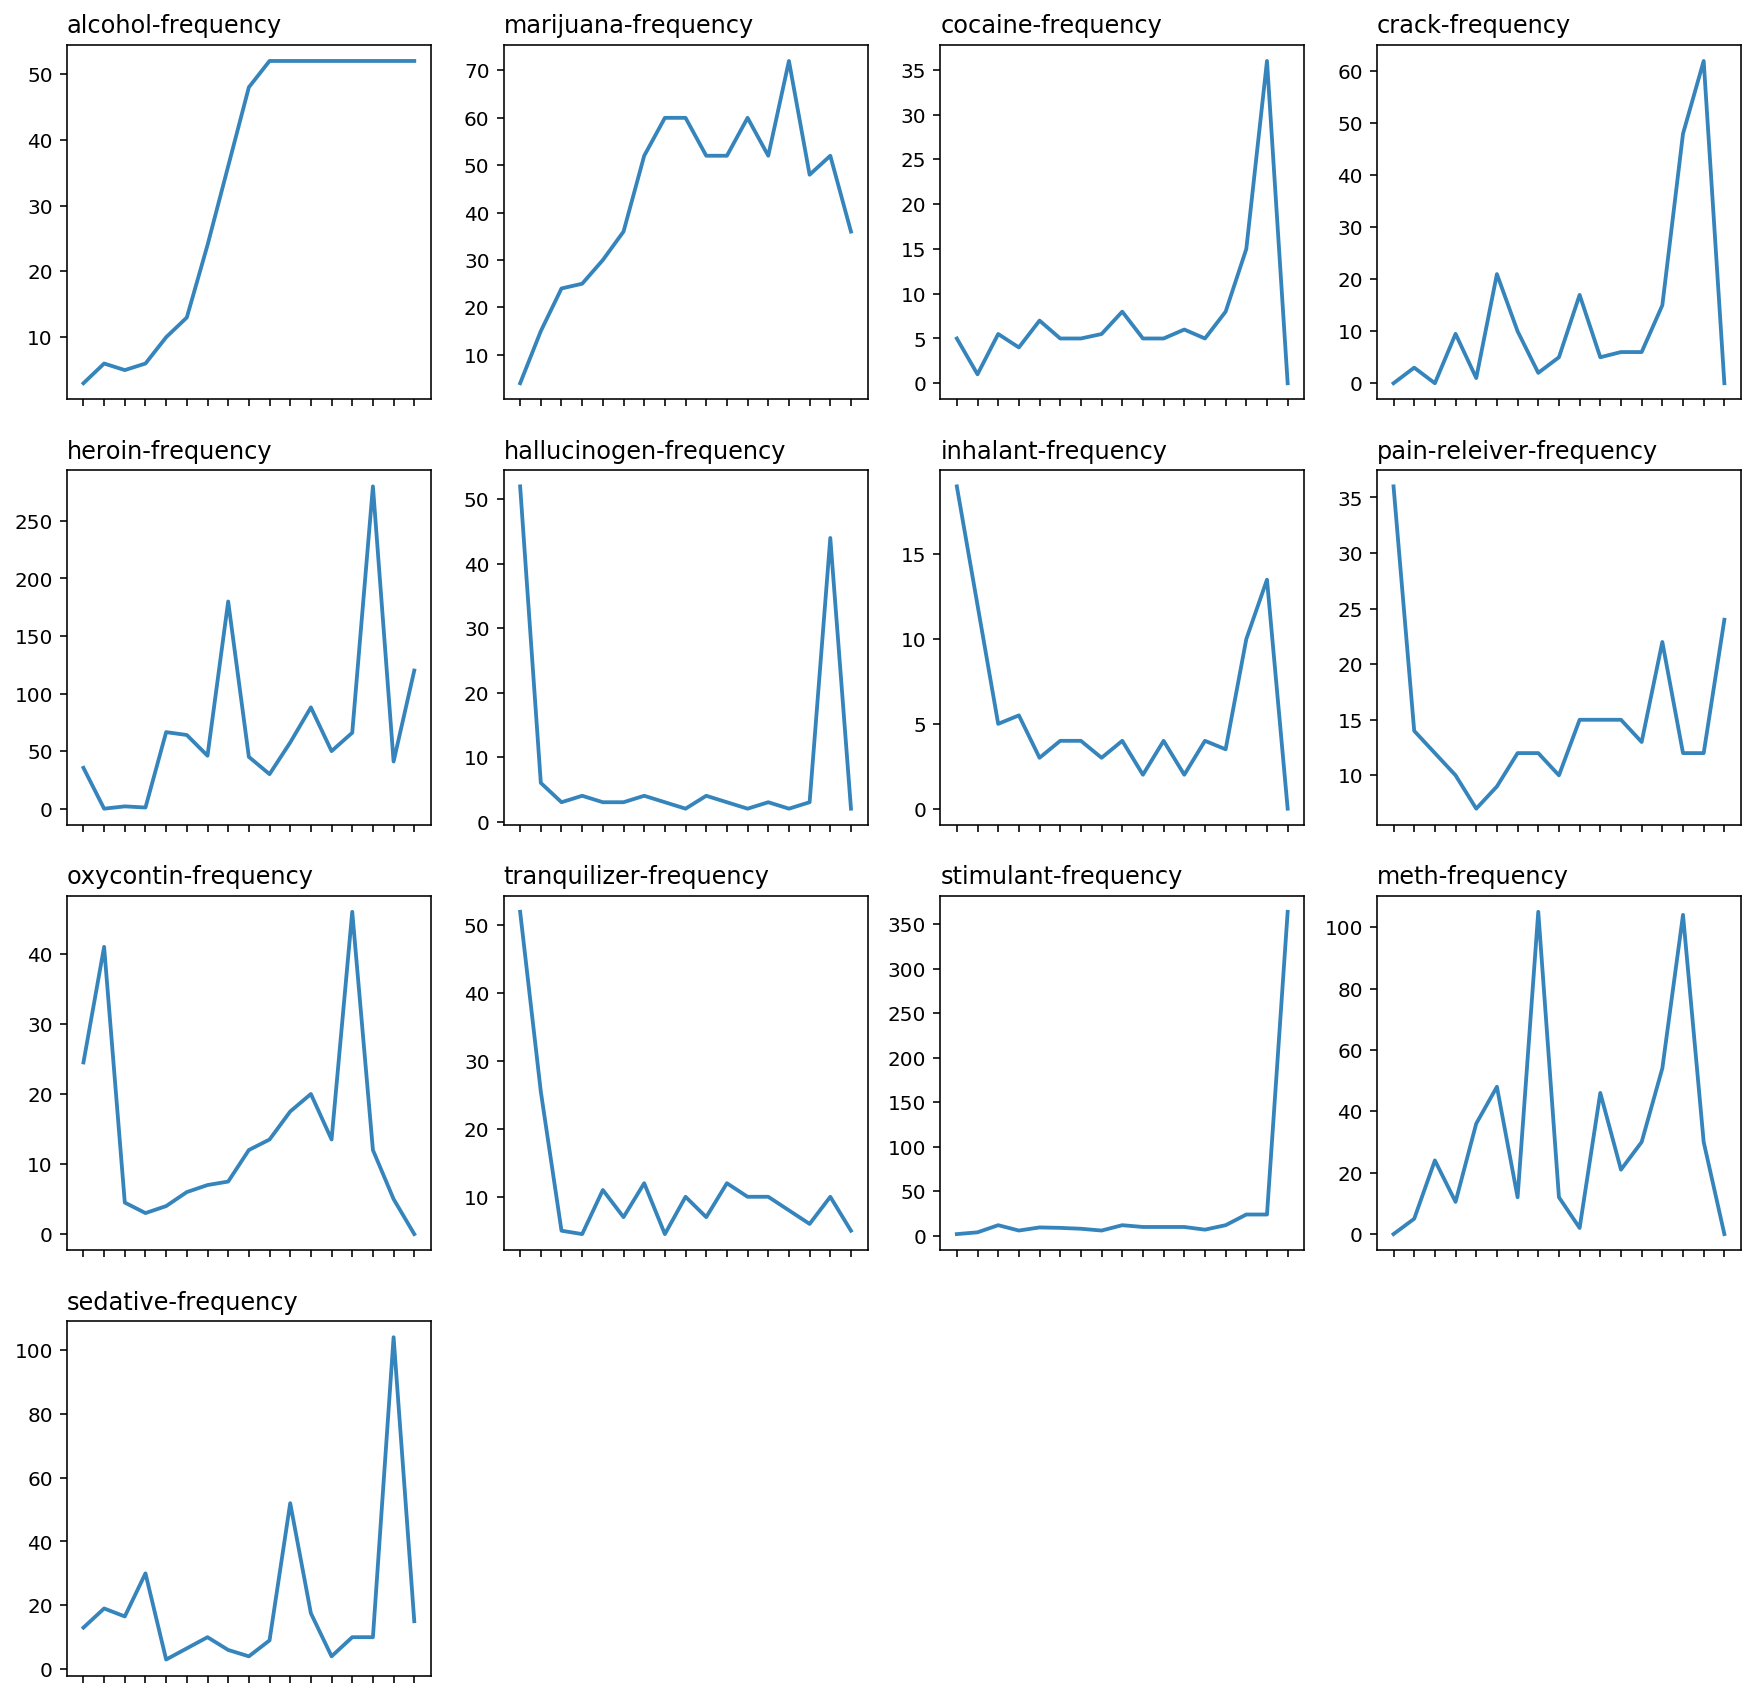

In [34]:
df5=df3[df3.columns[3::2]]
plt.subplots(figsize=(15, 15))
num=0
for column in df5:
    num+=1
    plt.subplot(4,4,num)
    plt.plot(df4.age,df5[column],linewidth=1.9,alpha=0.9,label=column)
    plt.tick_params(labelbottom=False)
    plt.title(column, loc='left', fontsize=12, fontweight=0)

In [36]:
df5.tail()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
12,52.0,52.0,5.0,6.0,50.0,3.0,4.0,13.0,13.5,10.0,7.0,30.0,4.0
13,52.0,72.0,8.0,15.0,66.0,2.0,3.5,22.0,46.0,8.0,12.0,54.0,10.0
14,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,24.0,104.0,10.0
15,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,24.0,30.0,104.0
16,52.0,36.0,0.0,0.0,120.0,2.0,0.0,24.0,0.0,5.0,364.0,0.0,15.0


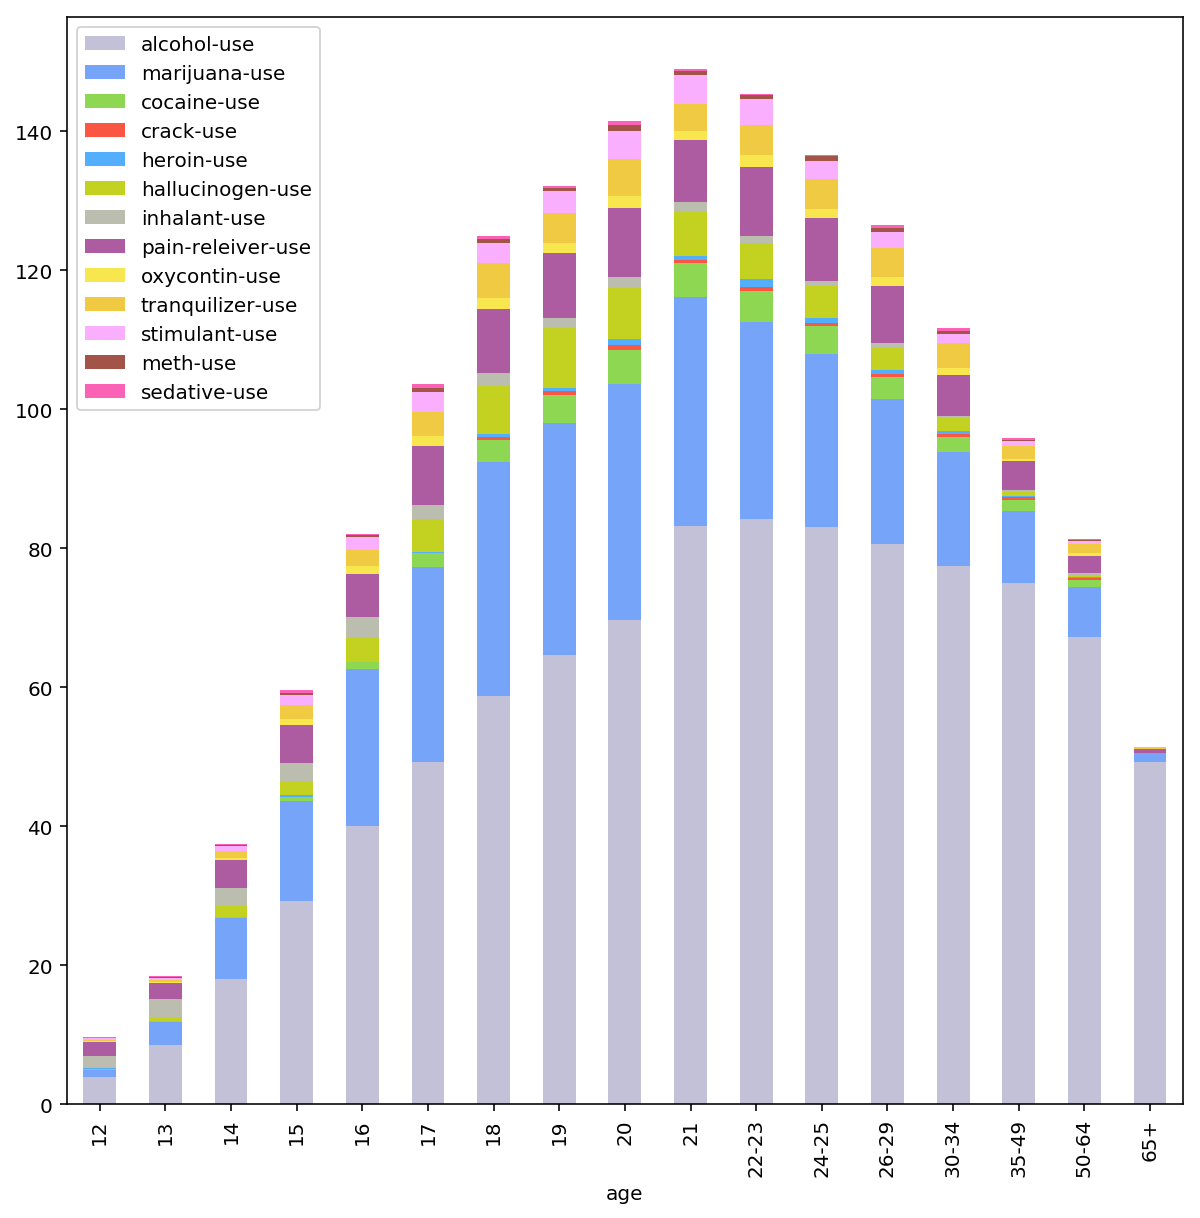

In [39]:
#Make a stacked bar plot

df6=df4.melt(id_vars=['age'])
fig, ax = plt.subplots(figsize=(10,10))
drug_use = df6['variable'].drop_duplicates()
age_bottom = np.zeros(len(df6['age'].drop_duplicates()))
colors = ["#C3C1D7", "#75A4F9","#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72","#8E6856"]
for num, drug in enumerate(drug_use):
    values = list(df6[df6['variable'] == drug].loc[:, 'value'])

    df6[df6['variable'] == drug].plot.bar(x='age',y='value', ax=ax, stacked=True, 
                                    bottom = age_bottom, color=colors[num], label=drug)
    age_bottom += values

plt.show()


### Observations
- Alcohol definitely dominates all the age categories, with significant increase as we go up the age group
- Marijuana follow is second but does decrease after 29
- Rest of the drugs are quite small in proportion compared to the above two lets look at them closely below

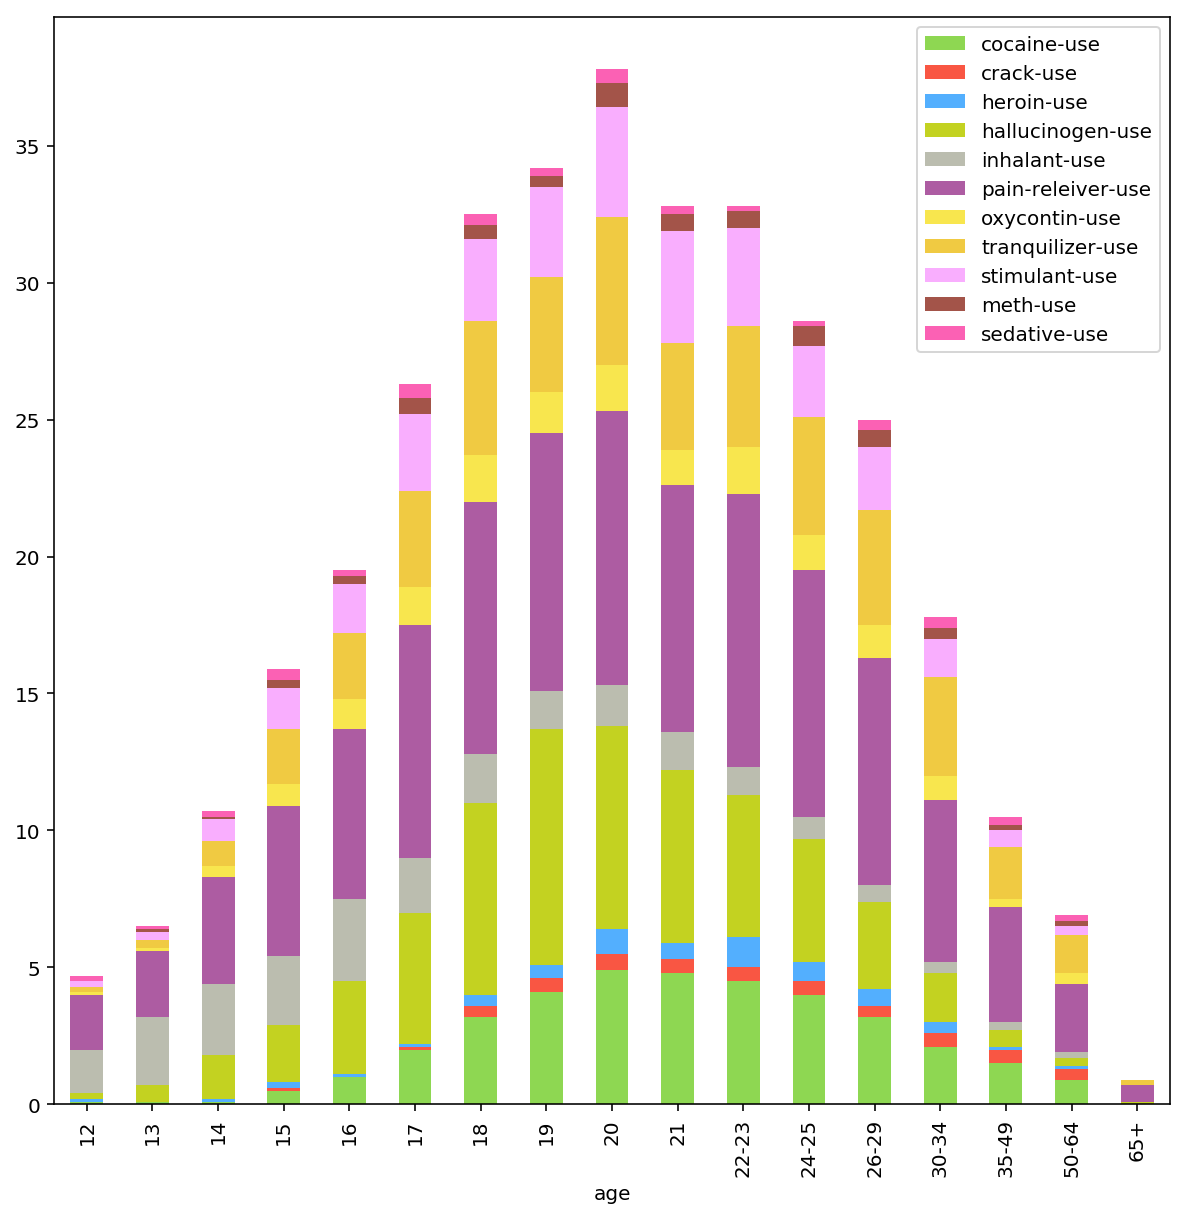

In [40]:
df6_drugs=df4.drop(['alcohol-use','marijuana-use'],axis=1).melt(id_vars=['age'])
fig, ax = plt.subplots(figsize=(10,10))
drug_use = df6_drugs['variable'].drop_duplicates()
age_bottom = np.zeros(len(df6_drugs['age'].drop_duplicates()))
colors = ["#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72","#8E6856", "#C3C1D7", "#75A4F9"]
for num, drug in enumerate(drug_use):
    values = list(df6_drugs[df6_drugs['variable'] == drug].loc[:, 'value'])

    df6_drugs[df6_drugs['variable'] == drug].plot.bar(x='age',y='value', ax=ax, stacked=True, 
                                    bottom = age_bottom, color=colors[num], label=drug)
    age_bottom += values

plt.show()

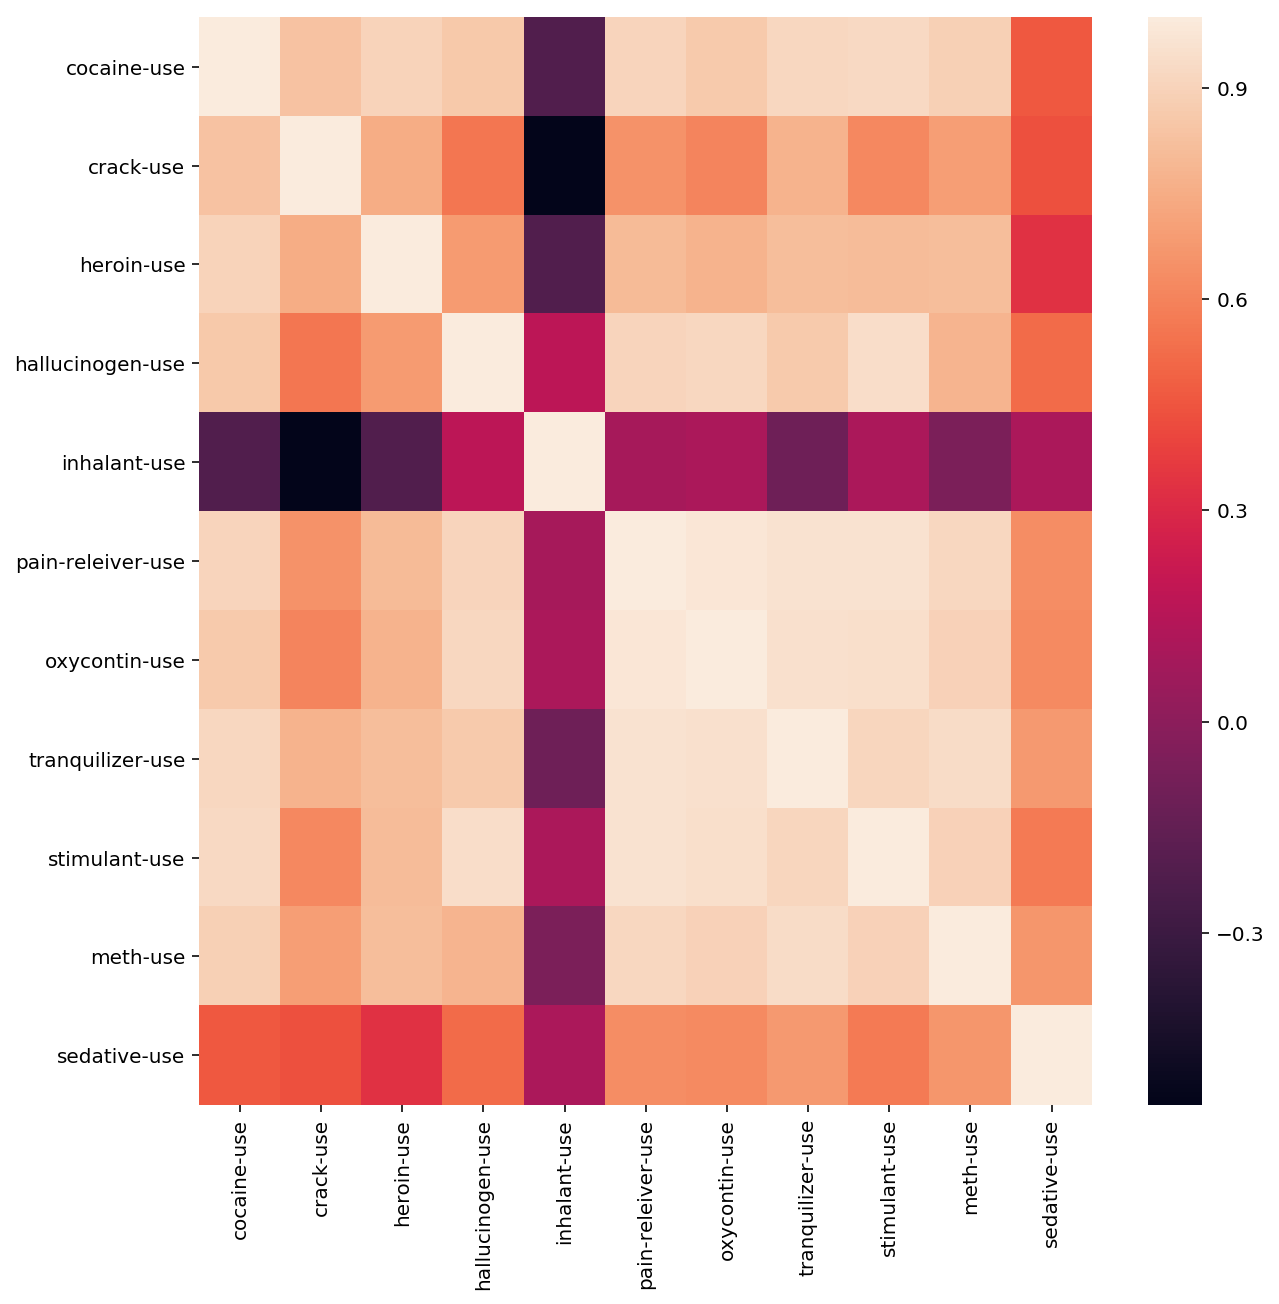

In [85]:
plt.subplots(figsize=(10, 10))
df4_correlations = df4.drop(['alcohol-use','marijuana-use'],axis=1).corr()
sns.heatmap(df4_correlations)

### Observations
- I notice some theres some positive correlations in the right bottom corner which are mostly pharmacetical type drugs on both axis, same on the left upper corner which are street type drugs

- Also moving forward I don't think inhalent-use will be useful as its more of things like glue,paint cans etc and not usually hard drugs

***

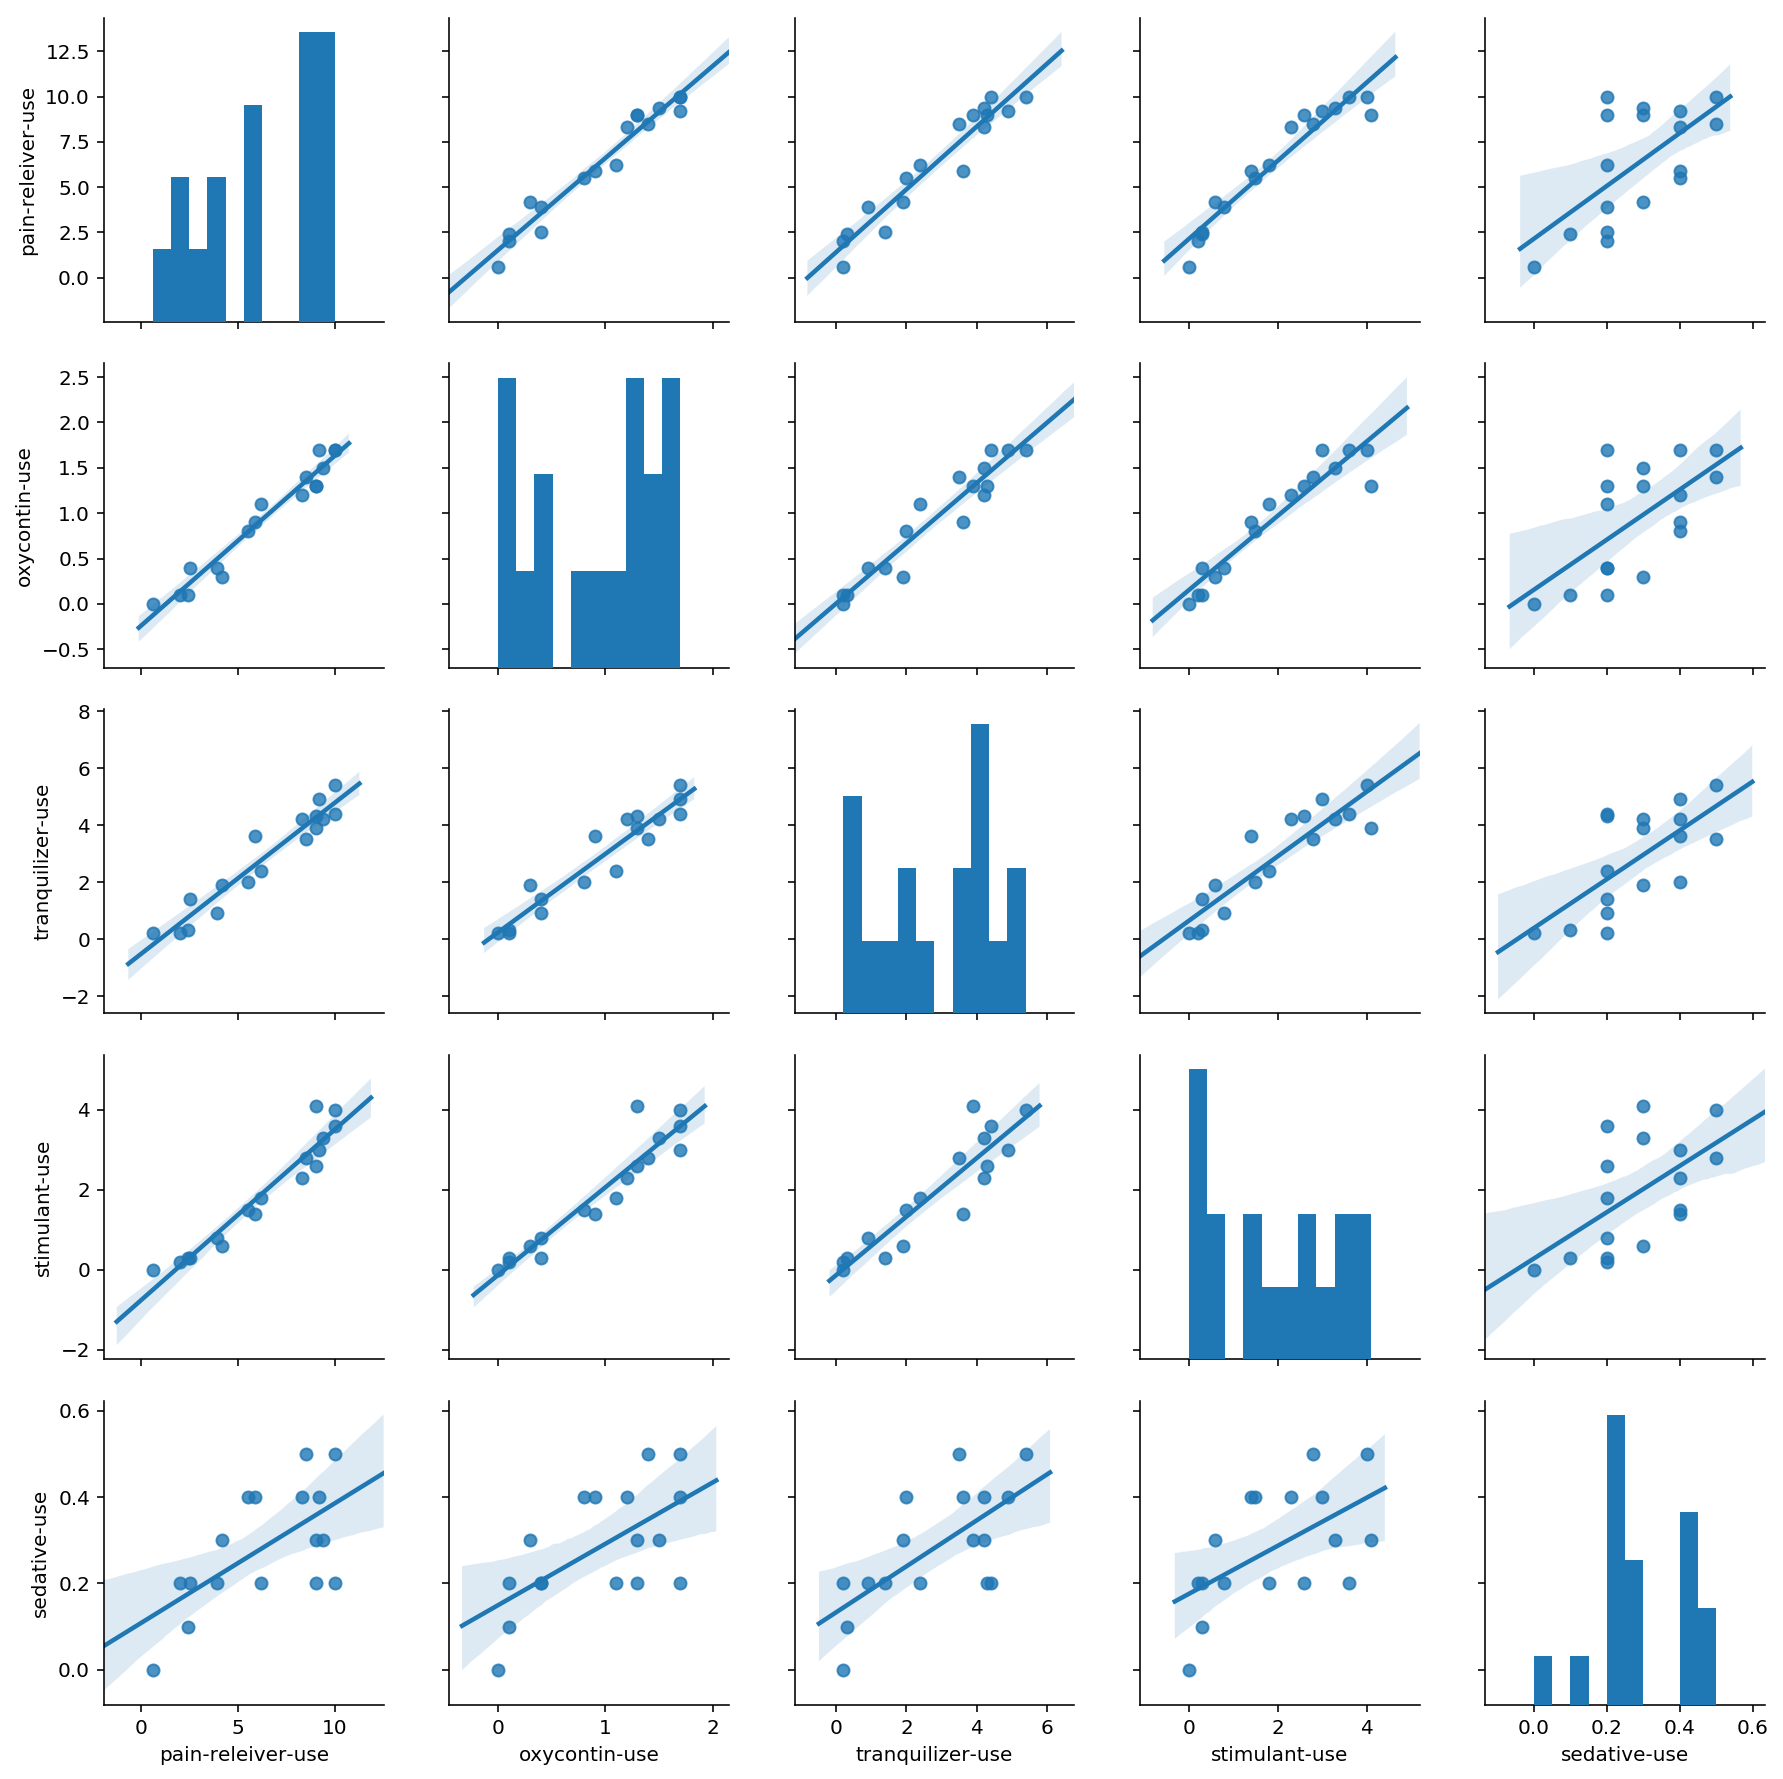

In [87]:
#A quick overview for drugs that from now own I'll pool together as 'Pharmaceutical Drugs'

sns.pairplot(df4[['pain-releiver-use',
       'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'sedative-use']], palette="Set2",kind='reg')
plt.show()


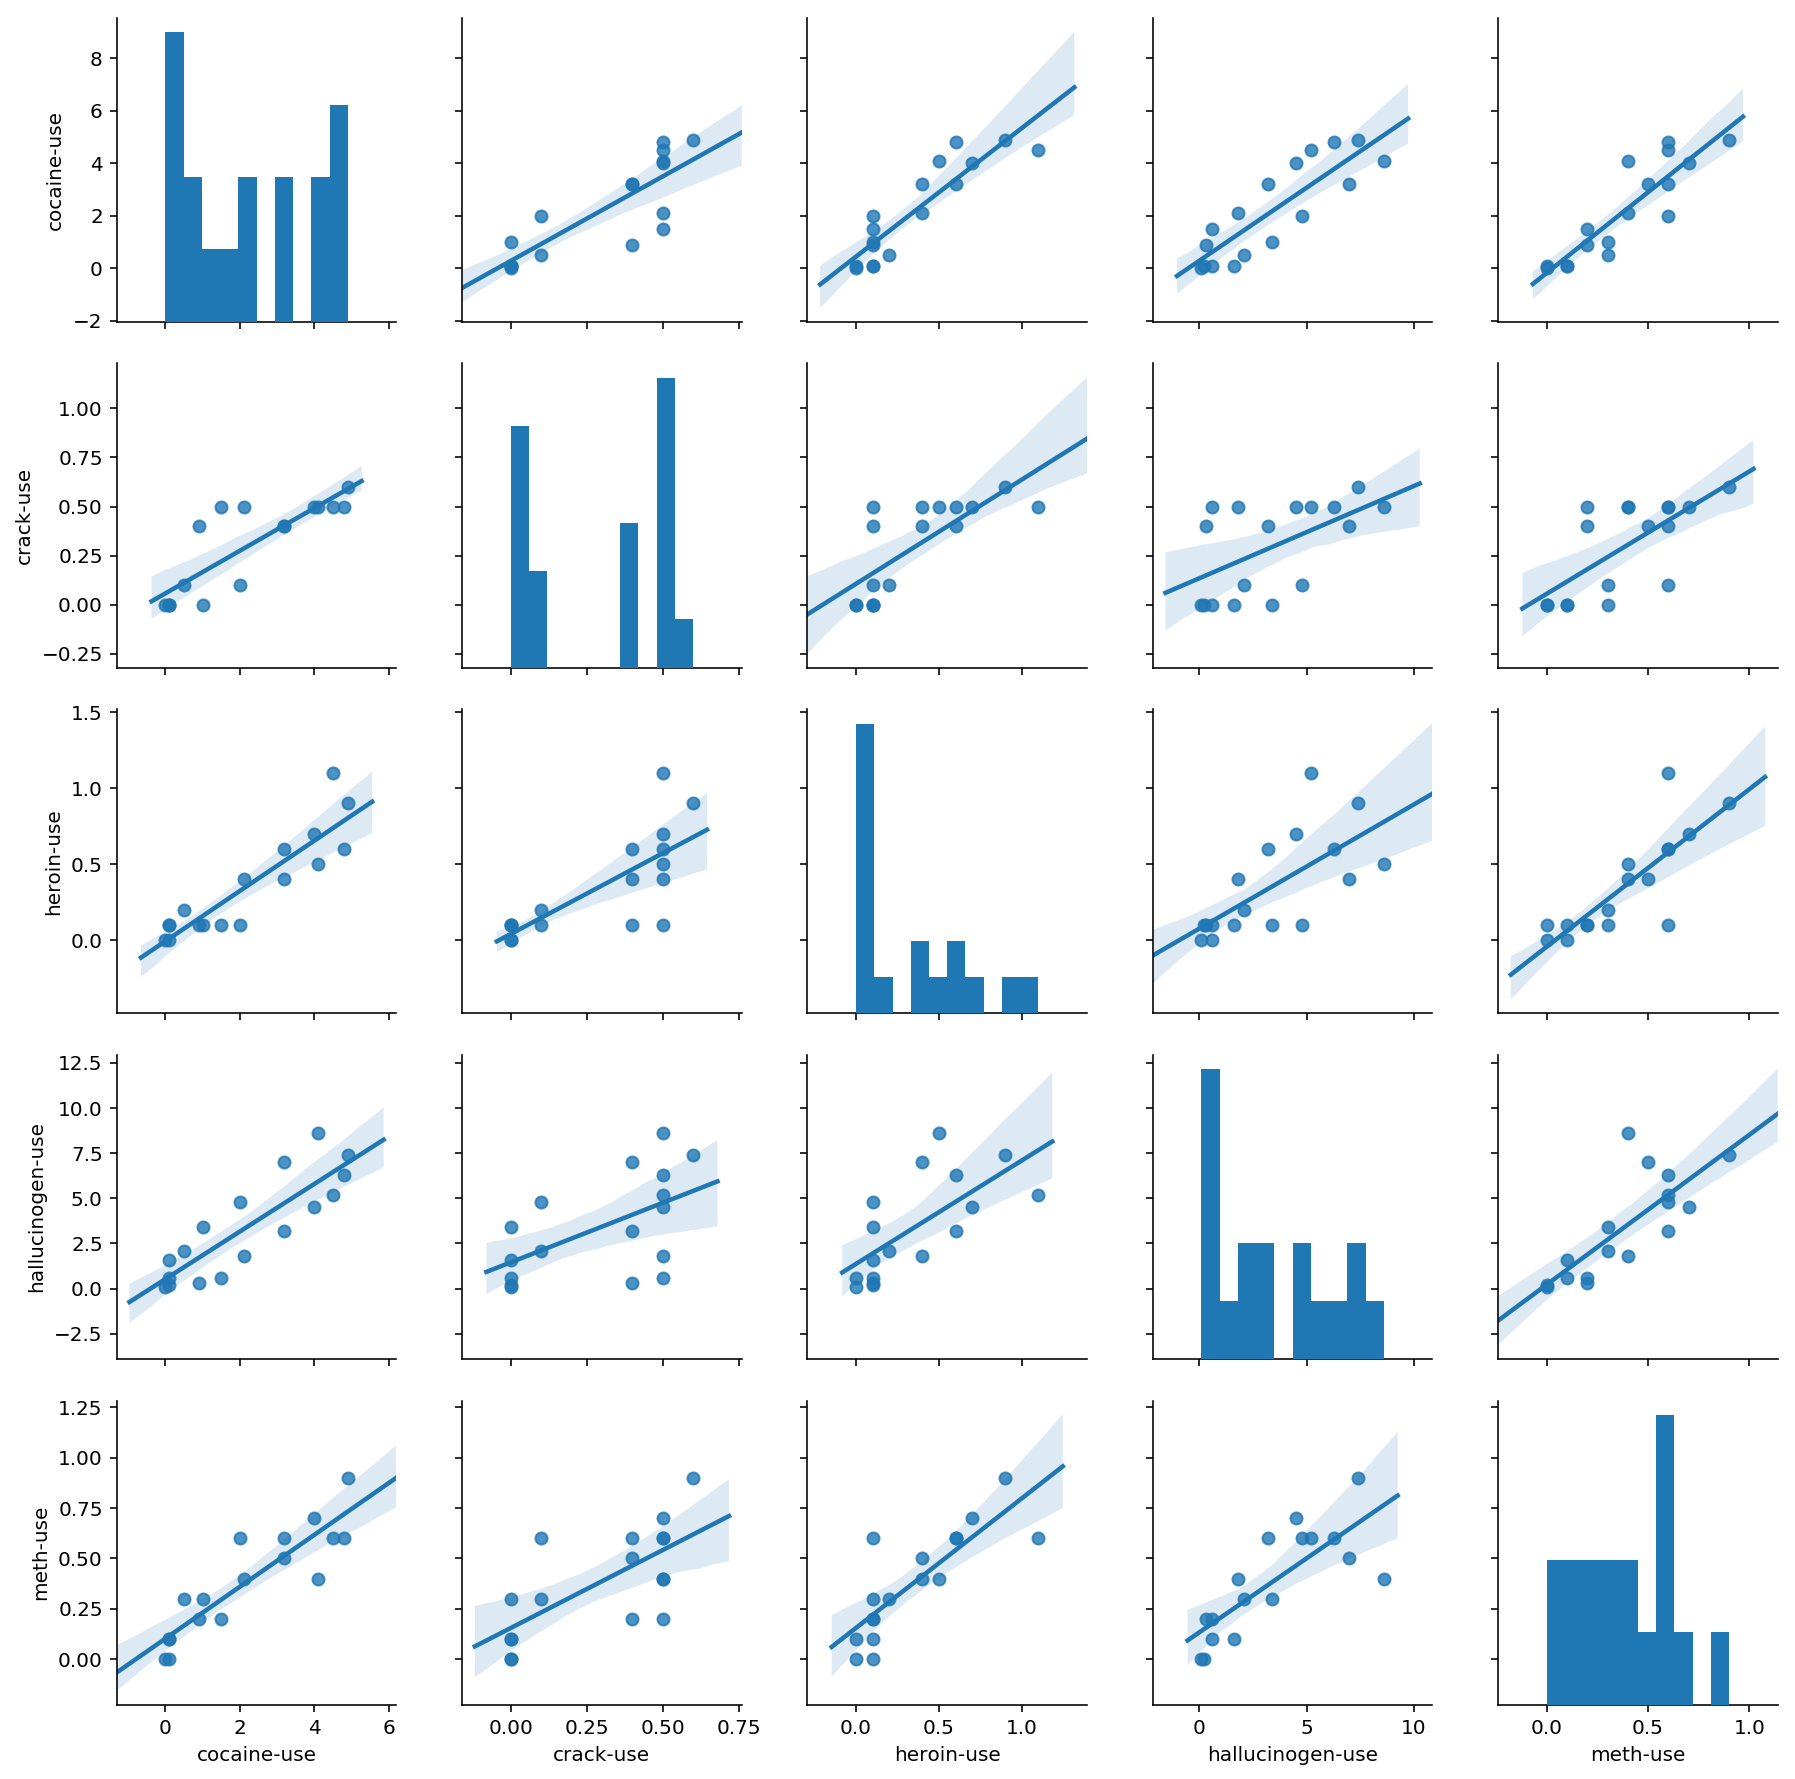

In [43]:
#A quick overview for drugs that from now own I'll pool together as 'Illicit Drugs'

sns.pairplot(df4[['cocaine-use', 'crack-use',
       'heroin-use', 'hallucinogen-use','meth-use']], palette="Set2",kind='reg')
plt.show()

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables:**
***************************
So to start off as mentioned earlier I have decided to create two groups of drugs ie

**Street(Illicit) drugs**:cocaine, crack, heroin, hallucinogen, meth

**Pharmaceutical drugs**:pain-releiver,oxycontin,tranquilizer, stimulant, sedative


In [45]:
# Make a new dataframe by combining the above mention individual drug columns into one main category
st_drug=['cocaine-use', 'crack-use','heroin-use', 'hallucinogen-use','meth-use']
ph_drug=['pain-releiver-use','oxycontin-use', 'tranquilizer-use', 'stimulant-use','sedative-use']

final_df=df3[['age','n']]
final_df['Street_Drugs']=df3.loc[:, st_drug].sum(axis=1) #Add up the values for corresponding individual drugs
final_df['Pharmaceutical_Drugs']=df3.loc[:, ph_drug].sum(axis=1)

final_df

C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,age,n,Street_Drugs,Pharmaceutical_Drugs
0,12,2798,0.4,2.7
1,13,2757,0.8,3.2
2,14,2792,1.9,6.2
3,15,2956,3.2,10.2
4,16,3058,4.8,11.7
5,17,3038,7.6,16.7
6,18,2469,11.5,19.2
7,19,2223,14.1,18.7
8,20,2271,14.7,21.6
9,21,2354,12.8,18.6


### Stacked bar plot to show above dataframe

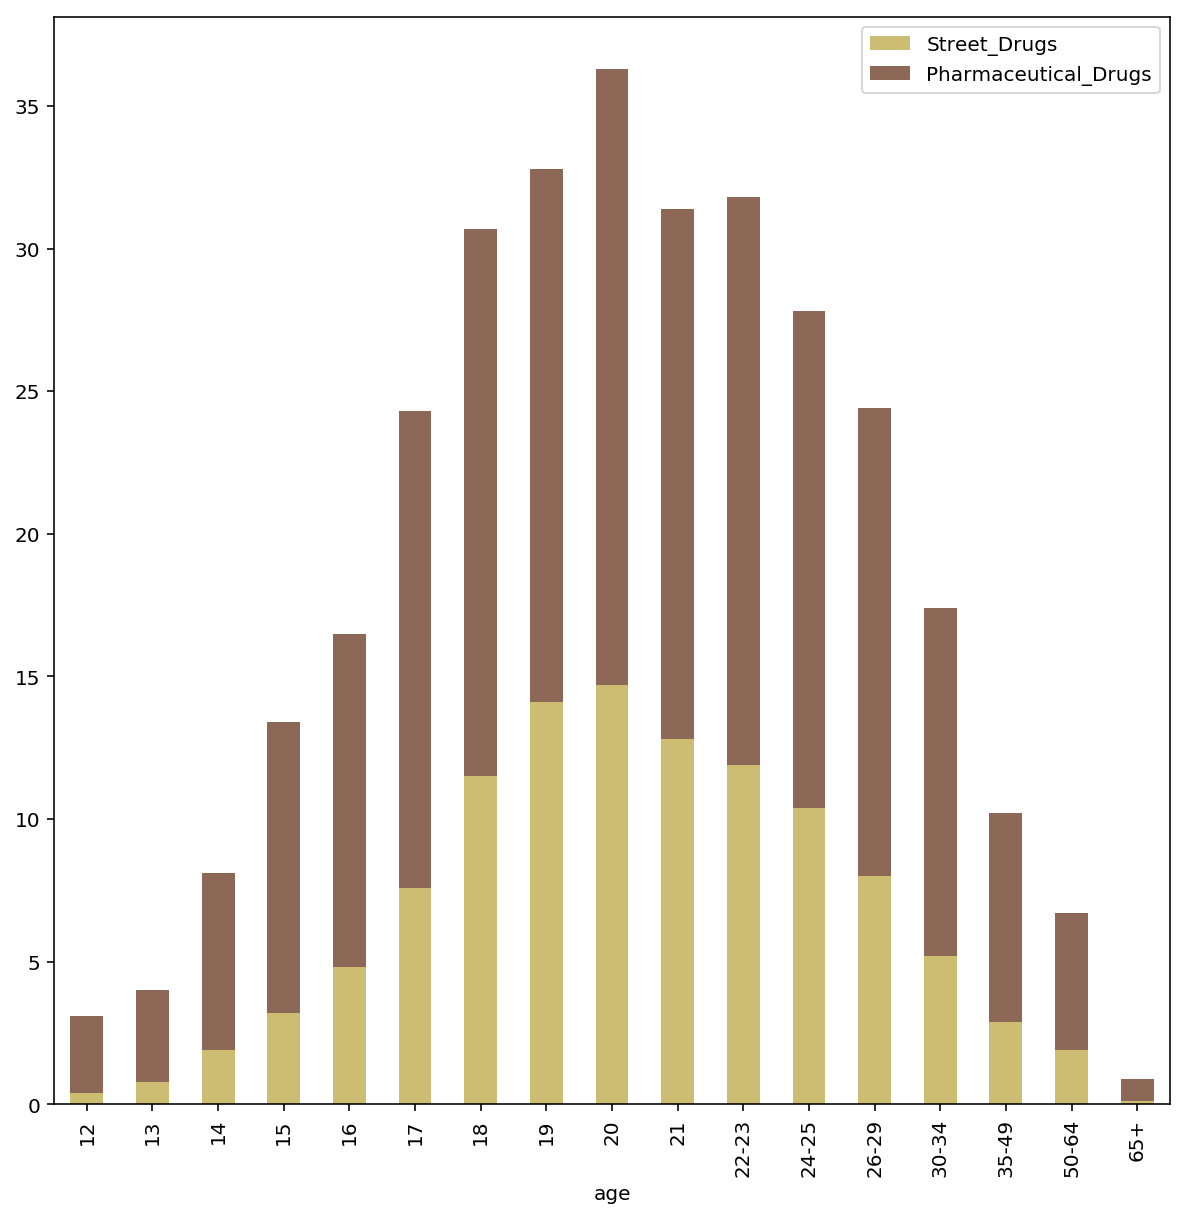

In [46]:
plot_drugs=final_df.drop(['n'],axis=1).melt(id_vars=['age'])
fig, ax = plt.subplots(figsize=(10,10))
drug_use = plot_drugs['variable'].drop_duplicates()
age_bottom = np.zeros(len(plot_drugs['age'].drop_duplicates()))
colors = ["#CDBD72","#8E6856"]
for num, drug in enumerate(drug_use):
    values = list(plot_drugs[plot_drugs['variable'] == drug].loc[:, 'value'])

    plot_drugs[plot_drugs['variable'] == drug].plot.bar(x='age',y='value', ax=ax, stacked=True, 
                                    bottom = age_bottom, color=colors[num], label=drug)
    age_bottom += values

plt.show()

### Moving forward I have decided to peform the chi squared test for independancy(conclusion below)

##### For this purpose I need to convert my column values to actual number values this test

In [62]:
final_df['Street_Drugs']=(df3['n']/100)*df3.loc[:, st_drug].sum(axis=1) #Add up the values for corresponding individual drugs
final_df['Pharmaceutical_Drugs']=(df3['n']/100)*df3.loc[:, ph_drug].sum(axis=1)

final_df['Street_Drugs']=final_df['Street_Drugs'].astype(int)
final_df['Pharmaceutical_Drugs']=final_df['Pharmaceutical_Drugs'].astype(int)
final_df

C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Suraj Satheesan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,age,n,Street_Drugs,Pharmaceutical_Drugs
0,12,2798,11,75
1,13,2757,22,88
2,14,2792,53,173
3,15,2956,94,301
4,16,3058,146,357
5,17,3038,230,507
6,18,2469,283,474
7,19,2223,313,415
8,20,2271,333,490
9,21,2354,301,437


##### Stacked bar plot for the new dataframe

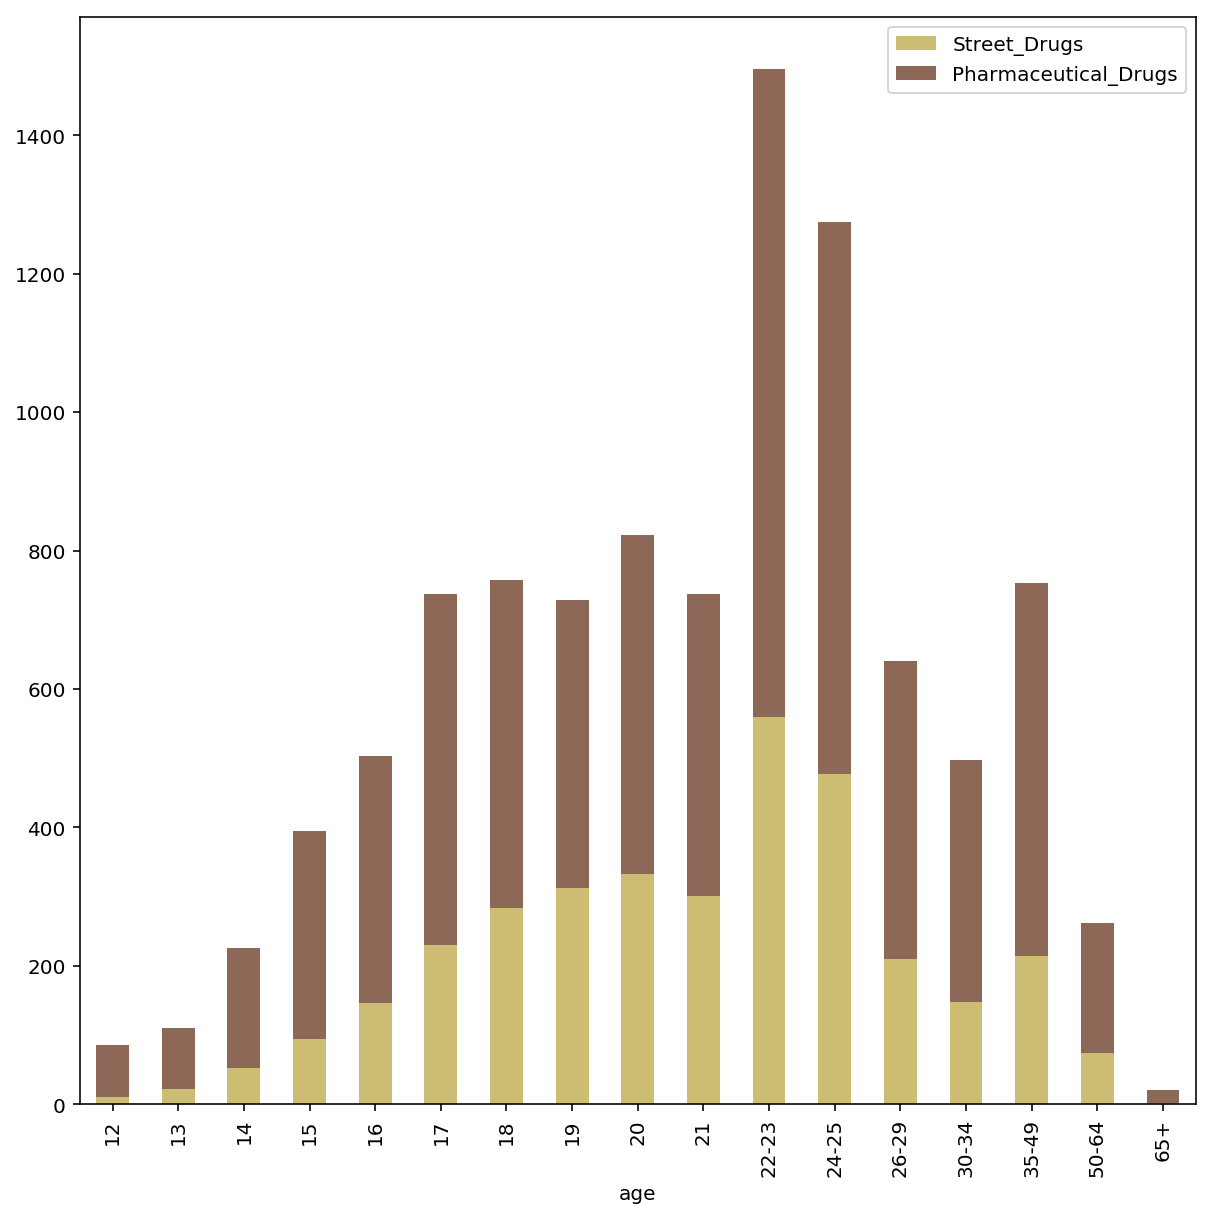

In [63]:
plot_drugs=final_df.drop(['n'],axis=1).melt(id_vars=['age'])
fig, ax = plt.subplots(figsize=(10,10))
drug_use = plot_drugs['variable'].drop_duplicates()
age_bottom = np.zeros(len(plot_drugs['age'].drop_duplicates()))
colors = ["#CDBD72","#8E6856"]
for num, drug in enumerate(drug_use):
    values = list(plot_drugs[plot_drugs['variable'] == drug].loc[:, 'value'])

    plot_drugs[plot_drugs['variable'] == drug].plot.bar(x='age',y='value', ax=ax, stacked=True, 
                                    bottom = age_bottom, color=colors[num], label=drug)
    age_bottom += values

plt.show()

##### The Chi-Squared Test for Independence - Using Scipy

In [50]:
import scipy.stats as stats

In [75]:
#Making a 2 way table for the test
trial=final_df.drop(['n'],axis=1).T
trial


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
Street_Drugs,11,22,53,94,146,230,283,313,333,301,560,477,210,148,214,74,2
Pharmaceutical_Drugs,75,88,173,301,357,507,474,415,490,437,936,798,430,349,539,188,19


In [76]:
f_obs = np.array([trial.iloc[1][0:17].values,
                  trial.iloc[2][0:17].values])
f_obs

array([[11, 22, 53, 94, 146, 230, 283, 313, 333, 301, 560, 477, 210, 148,
        214, 74, 2],
       [75, 88, 173, 301, 357, 507, 474, 415, 490, 437, 936, 798, 430,
        349, 539, 188, 19]], dtype=object)

In [77]:
stats.chi2_contingency(f_obs)[0:3]

(161.21575011700156, 4.7159026674848854e-26, 16)

**Report**

My hypothesis was to see if there was a relationship between the drug type and age hence the following;

> **H0:**There is no statistically significant relationship between age and type of drug abuse.

> **H1:**There is a statistically significant relationship between age and type of drug abuse.

my alpha=0.05, so if my p-value is below the alpha value then I reject the null

>**Chi-Squared Test Result:**
   p-value=4.71590e-26

### Conclusion
With a p-value < 0.05, I can reject the null, hence there is some relationship betweeen the age and the type of drug abuse

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.